<a href="https://colab.research.google.com/github/luisfernandorutti43-wq/Pinta-mi-emoci-n/blob/main/Pinta%20mi%20emoci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn gradio

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import gradio as gr


In [3]:
# Datos de ejemplo (mini dataset)
textos = [
    "estoy feliz", "me siento alegre", "tengo miedo", "estoy triste",
    "estoy enojado", "me siento con rabia", "estoy relajado", "tengo paz"
]
emociones = ["feliz", "feliz", "miedo", "triste", "enojo", "enojo", "calma", "calma"]

# Convertir etiquetas en números
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoder = LabelEncoder()
y = encoder.fit_transform(emociones)

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(textos)
X = tokenizer.texts_to_sequences(textos)
X = pad_sequences(X, maxlen=5)

# Definir red neuronal simple
model = keras.Sequential([
    layers.Embedding(input_dim=100, output_dim=16, input_length=5),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation="relu"),
    layers.Dense(len(set(y)), activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Entrenar
model.fit(X, y, epochs=30, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1250 - loss: 1.6079
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.3750 - loss: 1.6062
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.3750 - loss: 1.6046
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3750 - loss: 1.6030
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.3750 - loss: 1.6014
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3750 - loss: 1.5998
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3750 - loss: 1.5982
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3750 - loss: 1.5966
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3750 - loss: 1.5950
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3750 - loss: 1.5932
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3750 - loss: 1.5914
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3750 - loss: 1.58

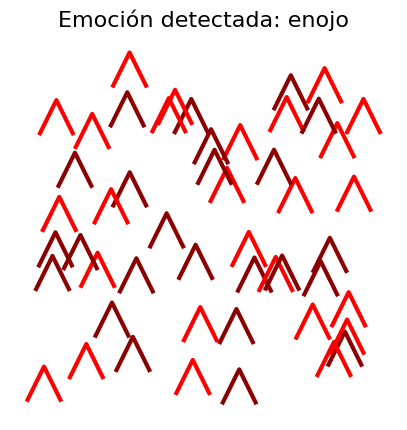

In [4]:
import matplotlib.pyplot as plt
import random

# Diccionario de colores y estilos según emoción
mapa_emociones = {
    "feliz": {"colores": ["yellow", "orange"], "forma": "circle"},
    "triste": {"colores": ["blue", "navy"], "forma": "line"},
    "enojo": {"colores": ["red", "darkred"], "forma": "zigzag"},
    "miedo": {"colores": ["black", "purple"], "forma": "spike"},
    "calma": {"colores": ["green", "lightblue"], "forma": "wave"},
}

def generar_arte(texto):
    # Procesar texto → emoción
    secuencia = tokenizer.texts_to_sequences([texto])
    secuencia = pad_sequences(secuencia, maxlen=5)
    pred = model.predict(secuencia, verbose=0)
    emocion = encoder.inverse_transform([np.argmax(pred)])[0]

    # Datos de arte
    info = mapa_emociones.get(emocion, {"colores": ["gray"], "forma": "circle"})

    # Dibujar
    plt.figure(figsize=(5,5))
    for _ in range(50):
        x, y = random.random(), random.random()
        color = random.choice(info["colores"])

        if info["forma"] == "circle":
            plt.scatter(x, y, c=color, s=500, alpha=0.6)
        elif info["forma"] == "line":
            plt.plot([x, x+0.1], [y, y+0.1], c=color, linewidth=3)
        elif info["forma"] == "zigzag":
            plt.plot([x, x+0.05, x+0.1], [y, y+0.1, y], c=color, linewidth=3)
        elif info["forma"] == "spike":
            plt.scatter(x, y, c=color, s=100, marker="^")
        elif info["forma"] == "wave":
            plt.plot([x+0.1*np.sin(10*y)], [y], c=color, marker="o")

    plt.axis("off")
    plt.title(f"Emoción detectada: {emocion}", fontsize=16)
    plt.show()

# Ejemplo:
generar_arte("me siento feliz pero con miedo")


In [6]:
from google.colab import files

files.download("/tmp/arte.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import gradio as gr

# Diccionario de emociones con colores
emociones_colores = {
    "alegría": "#FFD700",        # Amarillo brillante
    "amor": "#FF69B4",           # Rosa intenso
    "ansiedad": "#8B0000",       # Rojo oscuro
    "asco": "#556B2F",           # Verde oliva
    "celos": "#006400",          # Verde oscuro
    "confianza": "#20B2AA",      # Verde azulado
    "depresión": "#191970",      # Azul medianoche
    "desconfianza": "#808080",   # Gris
    "desesperanza": "#2F4F4F",   # Gris oscuro
    "duda": "#D2B48C",           # Marrón claro
    "enojo": "#B22222",          # Rojo fuerte
    "escepticismo": "#708090",   # Gris pizarra
    "frustración": "#A52A2A",    # Marrón
    "gratitud": "#00FA9A",       # Verde menta
    "hambre": "#FF8C00",         # Naranja fuerte
    "odio": "#8B0000",           # Rojo oscuro profundo
    "honor": "#4682B4",          # Azul acero
    "humildad": "#F5DEB3",       # Trigo
    "humillación": "#8B4513",    # Marrón tierra
    "ira": "#FF0000",            # Rojo puro
    "lástima": "#C0C0C0",        # Plateado
    "miedo": "#000080",          # Azul marino
    "orgullo": "#DAA520",        # Oro viejo
    "pasión": "#FF4500",         # Rojo anaranjado
    "pena": "#B0C4DE",           # Azul tenue
    "placer": "#FFB6C1",         # Rosa claro
    "preocupación": "#483D8B",   # Azul oscuro
    "regocijo": "#FFDAB9",       # Melocotón
    "resentimiento": "#4B0082",  # Índigo
    "respeto": "#5F9EA0",        # Verde azulado grisáceo
    "sabiduría": "#6A5ACD",      # Azul pizarra
    "satisfacción": "#98FB98",   # Verde claro
    "seguridad": "#2E8B57",      # Verde mar
    "serenidad": "#ADD8E6",      # Azul claro
    "soberbia": "#800080",       # Púrpura
    "sufrimiento": "#000000",    # Negro
    "temor": "#191970",          # Azul medianoche
    "tristeza": "#1E90FF",       # Azul
    "verdad": "#FFFFFF",         # Blanco
    "vituperio": "#8B008B" ,      # Violeta oscuro
    "feliz": "#FFD700"          # Amarillo
    # 👉 aquí van los demás hasta los 42...
}

def generar_arte(emocion):
    emocion = emocion.lower().strip()
    if emocion in emociones_colores:
        color = emociones_colores[emocion]
        # Generar HTML con fondo
        return f"""
        <div style='
            background-color: {color};
            padding: 50px;
            border-radius: 15px;
            color: white;
            text-align: center;
            font-size: 20px;
        '>
             Estás sintiendo: <b>{emocion.capitalize()}</b>

        </div>
        """
    else:
        return f"<div style='color:red; font-size:18px;'>❌ Emoción no reconocida</div>"

with gr.Blocks() as demo:
    gr.Markdown("## 🎨 Pinta mi emoción")
    entrada = gr.Textbox(label="Escribe tu emoción")
    salida = gr.HTML(label="Resultado")
    boton = gr.Button("Generar Arte")
    boton.click(generar_arte, inputs=entrada, outputs=salida)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a8ab713debfa4c4f7d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
